In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting fake data
fake_data = pd.read_csv("Fake.csv")

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_data.shape

(23481, 4)

In [6]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
data=fake_data.iloc[:,0:4]
data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
#filling missing values
data['subject']=data['subject'].fillna(data['subject'].mode()[0])
data['date']=data['date'].fillna(data['date'].mode()[0])

In [9]:
data=data.assign(label=0)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
true_data=pd.read_csv("True.csv")

In [11]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
true_data.shape

(21417, 4)

In [13]:
true_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
true_data=true_data.assign(label=1)
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
true_data.shape

(21417, 5)

In [16]:
data=data.append(true_data,ignore_index=True)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
data.shape

(44898, 5)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


# DATA PREPROCESSING

In [19]:
data['title']=data['title'].str.lower()
data['text']=data['text'].str.lower()
data['subject']=data['subject'].str.lower()
data['date']=data['date'].str.lower()

In [20]:
# Removing numbers
data['title']=data['title'].replace(to_replace="[0-9]",value='', regex=True)
data['text']=data['text'].replace(to_replace="[0-9]",value='', regex=True)
data['subject']=data['subject'].replace(to_replace="[0-9]",value='', regex=True)
data['date']=data['date'].replace(to_replace="[0-9]",value='', regex=True)

In [21]:
# Removing symbols
data['title']=data['title'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['text']=data['text'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['subject']=data['subject'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)
data['date']=data['date'].replace(to_replace='[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',value='', regex=True)

In [22]:
# Removing stopwords
stop= stopwords.words('english')
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['text'] = data['text'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop)]))
data['subject'] = data['subject'].apply(lambda z: ' '.join([word for word in z.split() if word not in (stop)]))

In [23]:
data.head()

,title,text,subject,date,label
0,donald trump sends embarrassing new year’s eve...,donald trump wish americans happy new year lea...,news,december,0
1,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,news,december,0
2,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,news,december,0
3,trump obsessed even obama’s name coded website...,christmas day donald trump announced would bac...,news,december,0
4,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,news,december,0


OBSERVATION:
    All text in dataset is converted to lowecase and symbols are removed

# DATA VISUALIZATION:

In [24]:
data['subject'].value_counts()

politicsnews       11272
worldnews          10145
news                9050
politics            6841
leftnews            4459
government news     1570
usnews               783
middleeast           778
Name: subject, dtype: int64

In [25]:
data['subject']=data['subject'].replace(['news','politics'],['worldnews','politicsnews'])

worldnews          19195
politicsnews       18113
leftnews            4459
government news     1570
usnews               783
middleeast           778
Name: subject, dtype: int64


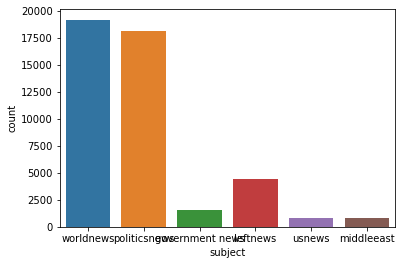

In [27]:
ax= sns.countplot(x='subject',data=data)
print(data['subject'].value_counts())

0    23481
1    21417
Name: label, dtype: int64


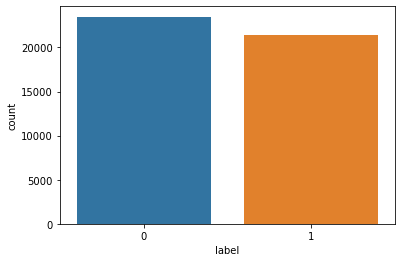

In [28]:
ax= sns.countplot(x='label',data=data)
print(data['label'].value_counts())

In [29]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

# DATA ANALYSIS:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44898 non-null  float64
 1   text     44898 non-null  float64
 2   subject  44898 non-null  float64
 3   date     44898 non-null  float64
 4   label    44898 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.7 MB


In [31]:
data.describe()

,title,text,subject,date,label
count,44898.000000,44898.000000,44898.000000,44898.000000,44898.000000
mean,19129.369437,18873.275981,3.551628,23.770569,0.477015
std,11266.483099,11196.264918,1.467171,13.193514,0.499477
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9365.000000,9337.250000,3.000000,10.000000,0.000000
50%,18912.500000,18869.500000,3.000000,27.000000,0.000000
75%,28839.750000,28301.000000,5.000000,35.000000,1.000000
max,38676.000000,38635.000000,5.000000,41.000000,1.000000


# CORRELATION:

In [32]:
data.corr()

,title,text,subject,date,label
title,1.000000,0.121413,0.015210,-0.005014,0.035414
text,0.121413,1.000000,-0.115756,-0.023619,0.197837
subject,0.015210,-0.115756,1.000000,0.153658,0.257612
date,-0.005014,-0.023619,0.153658,1.000000,0.219934
label,0.035414,0.197837,0.257612,0.219934,1.000000


<AxesSubplot:>

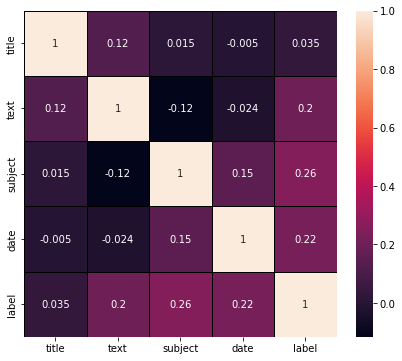

In [33]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

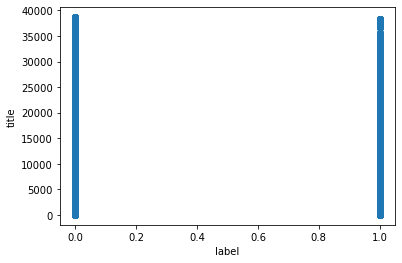

In [34]:
plt.scatter(data['label'],data['title'])
plt.xlabel('label')
plt.ylabel('title')
plt.show()

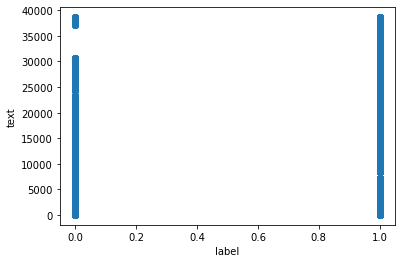

In [35]:
plt.scatter(data['label'],data['text'])
plt.xlabel('label')
plt.ylabel('text')
plt.show()

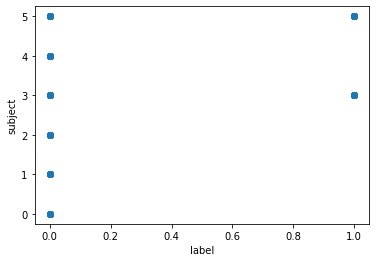

In [36]:
plt.scatter(data['label'],data['subject'])
plt.xlabel('label')
plt.ylabel('subject')
plt.show()

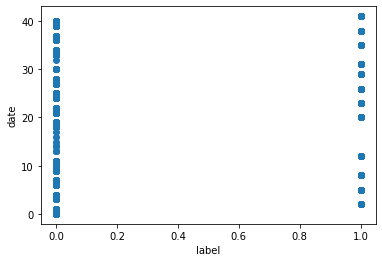

In [37]:
plt.scatter(data['label'],data['date'])
plt.xlabel('label')
plt.ylabel('date')
plt.show()

# DATA MODELING:

In [38]:
x=data.drop(['label'],axis=1)
y=data['label']

# LOGISTIC REGRESSION:

In [39]:
lr=LogisticRegression()

In [40]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 56.3923889525264
Testing accuracy score: 56.98589458054937


random state 1
Training accuracy score: 56.3892070764923
Testing accuracy score: 56.919079435783225


random state 2
Training accuracy score: 56.64057528318697
Testing accuracy score: 56.42167780252413


random state 3
Training accuracy score: 56.59284714267532
Testing accuracy score: 56.42910170749814


random state 4
Training accuracy score: 56.513300241822584
Testing accuracy score: 56.88938381588715


random state 5
Training accuracy score: 56.61512027491409
Testing accuracy score: 56.674090571640676


random state 6
Training accuracy score: 56.360570192185314
Testing accuracy score: 56.45137342242019


random state 7
Training accuracy score: 56.513300241822584
Testing accuracy score: 55.93170007423905


random state 8
Training accuracy score: 56.39875270459462
Testing accuracy score: 56.5924276169265


random state 9
Training accuracy score: 56.28738704340079
Testing accuracy score

In [41]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=46)

In [42]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 56.510764662212324


In [43]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[3218 3727]
 [2131 4394]]


In [44]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      6945
           1       0.54      0.67      0.60      6525

    accuracy                           0.57     13470
   macro avg       0.57      0.57      0.56     13470
weighted avg       0.57      0.57      0.56     13470



# ROC AUC CURVE

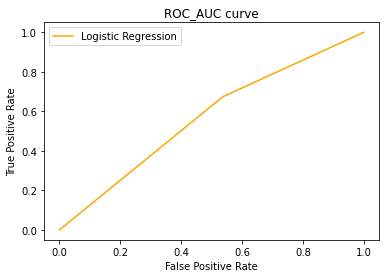

AUC_score 56.838244664564776


In [45]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

# K Neighbors Classifier

In [46]:
knn= KNeighborsClassifier()

In [47]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 91.3548428153239
Testing accuracy score: 87.1863400148478


random state 1
Training accuracy score: 91.23074964999364
Testing accuracy score: 87.34966592427617


random state 2
Training accuracy score: 91.17029400534555
Testing accuracy score: 87.1789161098738


random state 3
Training accuracy score: 91.27529591447117
Testing accuracy score: 87.23088344469191


random state 4
Training accuracy score: 91.2530227822324
Testing accuracy score: 87.07498144023756


random state 5
Training accuracy score: 91.2530227822324
Testing accuracy score: 87.20118782479585


random state 6
Training accuracy score: 91.24029527809596
Testing accuracy score: 87.27542687453601


random state 7
Training accuracy score: 91.33893343515336
Testing accuracy score: 87.23088344469191


random state 8
Training accuracy score: 91.34211531118748
Testing accuracy score: 87.01559020044543


random state 9
Training accuracy score: 91.16711212931145
Testing accuracy score: 87.35

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=68) 

In [49]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 87.21603563474387


# Confusion Matrix:

In [50]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[6337  653]
 [1069 5411]]


In [51]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6990
           1       0.89      0.84      0.86      6480

    accuracy                           0.87     13470
   macro avg       0.87      0.87      0.87     13470
weighted avg       0.87      0.87      0.87     13470



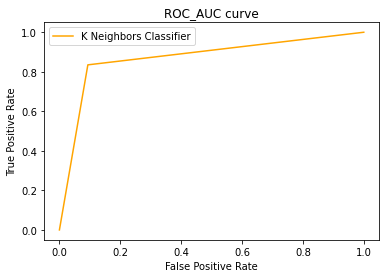

AUC_score 87.08058469771632


In [52]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

# Random Forest Classifier:

In [53]:
rfc=RandomForestClassifier()

In [54]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 99.48032665181886


random state 1
Training accuracy score: 100.0
Testing accuracy score: 99.3615441722346


random state 2
Training accuracy score: 100.0
Testing accuracy score: 99.64365256124722


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.45805493689681


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.54714179658501


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.56941351150705


random state 6
Training accuracy score: 100.0
Testing accuracy score: 99.56198960653305


random state 7
Training accuracy score: 100.0
Testing accuracy score: 99.47290274684484


random state 8
Training accuracy score: 100.0
Testing accuracy score: 99.62138084632517


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.69561989606534


random state 10
Training accuracy score: 100.0
Testing accuracy score: 99.4135115070527


random stat

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=93)

In [56]:
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 99.45805493689681


In [57]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[7028   16]
 [  57 6369]]


In [58]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7044
           1       1.00      0.99      0.99      6426

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



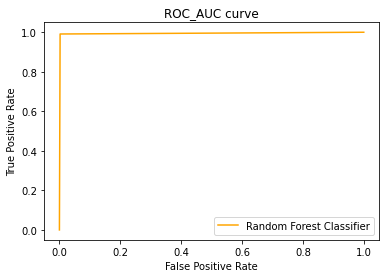

AUC_score 99.44291742818649


In [59]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

# Decision Tree Classifier:

In [60]:
clf=DecisionTreeClassifier()

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 99.9109131403118


random state 1
Training accuracy score: 100.0
Testing accuracy score: 99.85152190051967


random state 2
Training accuracy score: 100.0
Testing accuracy score: 99.91833704528582


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.91833704528582


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.92576095025983


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.97030438010394


random state 6
Training accuracy score: 100.0
Testing accuracy score: 99.89606533036377


random state 7
Training accuracy score: 100.0
Testing accuracy score: 99.96288047512992


random state 8
Training accuracy score: 100.0
Testing accuracy score: 99.9109131403118


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.86636971046771


random state 10
Training accuracy score: 100.0
Testing accuracy score: 99.91833704528582


random stat

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=40)

In [63]:
clf.fit(x_train,y_train)
y_pred4 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 99.94060876020787


In [64]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[7000    5]
 [   3 6462]]


In [65]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7005
           1       1.00      1.00      1.00      6465

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



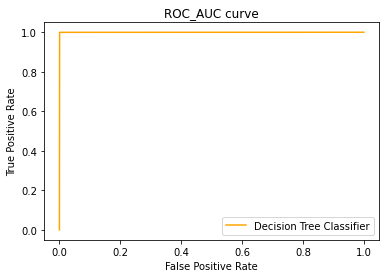

AUC_score 99.94110935013273


In [66]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

OBSERVATION: Decision Tree Classifier predicts better result for this problem, so i consider this model as a best model. Accuracy score is good thats why i don't require to tune the parameters.

# Saving File:

In [67]:
import joblib
joblib.dump(y_pred4,"Fake_News_Project.pkl")

['Fake_News_Project.pkl']

# CONCLUSION:

In [68]:
Predicted_label=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred4})
Predicted_label

,Actual data,Predicted data
37325,1,1
33133,1,1
1540,0,0
1674,0,0
22048,0,0
...,...,...
16177,0,0
40823,1,1
1123,0,0
19167,0,0
